In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/MartaDiaz/Marta Díaz_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
print(df.isnull().sum())

video_id        0
title           0
description     3
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [4]:
df['description'] = df['description'].fillna("")

In [5]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [6]:
%%time

# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

CPU times: user 47.5 s, sys: 1.85 s, total: 49.4 s
Wall time: 53.8 s


In [7]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [8]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('martar', 101), ('marto', 46), ('marta', 43), ('londres', 13), ('hermano', 12), ('viaje', 10), ('h', 10), ('reaccionar', 10), ('novio', 9), ('responder', 8), ('año', 8), ('tik', 8), ('rutina', 7), ('pregunta', 6), ('mañana', 6)]
          Word  Frequency
0       martar        101
1        marto         46
2        marta         43
3      londres         13
4      hermano         12
5        viaje         10
6            h         10
7   reaccionar         10
8        novio          9
9    responder          8
10         año          8
11         tik          8
12      rutina          7
13    pregunta          6
14      mañana          6


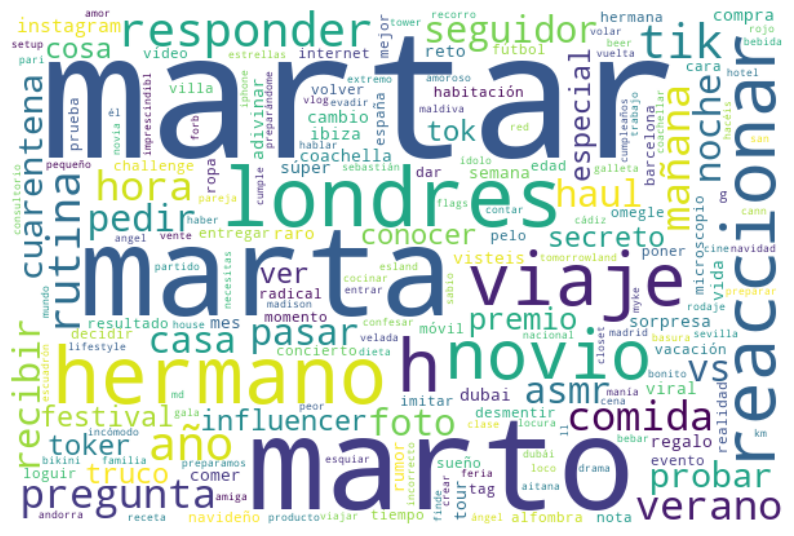

In [9]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [10]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('instagram', 146), ('martar', 137), ('tik', 103), ('tok', 100), ('ropa', 83), ('código', 76), ('especial', 59), ('sigueme', 55), ('dtco', 54), ('marta', 47), ('libro', 44), ('esperar', 42), ('encantar', 42), ('suígueme', 35), ('link', 17)]
         Word  Frequency
0   instagram        146
1      martar        137
2         tik        103
3         tok        100
4        ropa         83
5      código         76
6    especial         59
7     sigueme         55
8        dtco         54
9       marta         47
10      libro         44
11    esperar         42
12   encantar         42
13   suígueme         35
14       link         17


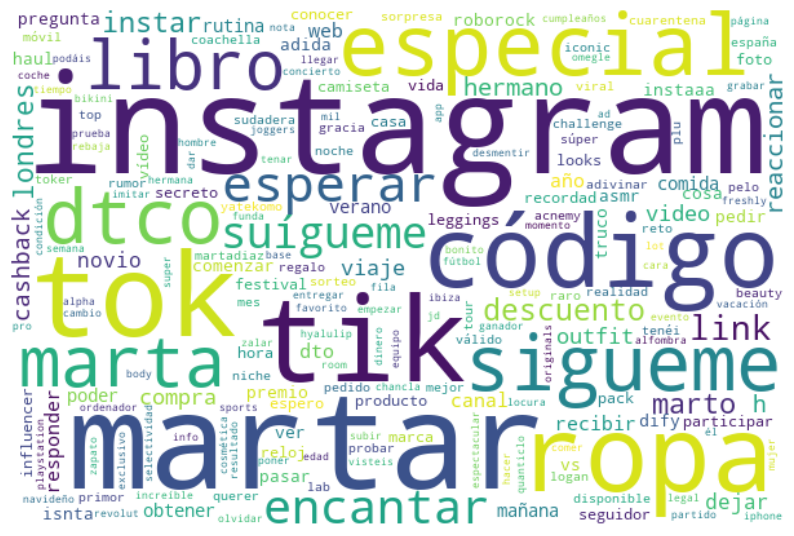

In [11]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
